In [1]:
import numpy as np
import pandas as pd

In [349]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)


In [350]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [351]:
df_train.shape

(7500, 17)

In [352]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                             482087.0
Years in current job                           NaN
Tax Liens                                      0.0
Number of Open Accounts                       11.0
Years of Credit History                       26.3
Maximum Open Credit                       685960.0
Number of Credit Problems                      1.0
Months since last delinquent                   NaN
Bankruptcies                                   1.0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                     99999999.0
Current Credit Balance                     47386.0
Monthly Debt                                7914.0
Credit Score                                 749.0
Credit Default                                   0
Name: 0, dtype: object

In [353]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Описание датасета

Home Ownership - домовладение (категориальная переменная)
Annual Income - годовой доход
Years in current job - количество лет на текущем месте работы (категориальная, но похожа на числовую)
Tax Liens - налоговые обременения
Number of Open Accounts - количество открытых счетов
Years of Credit History - количество лет кредитной истории
Maximum Open Credit - наибольший открытый кредит
Number of Credit Problems - количество проблем с кредитом
Months since last delinquent - количество месяцев с последней просрочки платежа
Bankruptcies - банкротства
Purpose - цель кредита (категориальная переменная)
Term - срок кредита (категориальная переменная)
Current Loan Amount - текущая сумма кредита
Current Credit Balance - текущий кредитный баланс
Monthly Debt - ежемесячный долг
Credit Score - кредитный скоринг
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка) целевая переменная

In [354]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [368]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb
import catboost as catb
import lightgbm as lgbm
import scipy.stats as stats


from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

from pathlib import Path

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

import random

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

%matplotlib inline

In [356]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()
NUMB_FEATURE_NAMES = ['Annual Income','Tax Liens','Number of Open Accounts','Years of Credit History',
                     'Maximum Open Credit','Number of Credit Problems','Months since last delinquent',
                     'Bankruptcies','Current Loan Amount','Current Credit Balance','Monthly Debt','Credit Score']
CAT_FEATURE_NAMES = ['Years in current job','Home Ownership','Purpose','Term']

In [357]:
y = df_train[[TARGET_NAME]]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Credit Default  7500 non-null   int64
dtypes: int64(1)
memory usage: 58.7 KB


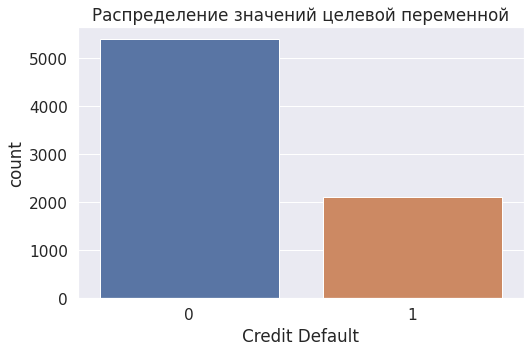

In [358]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df_train)

plt.title('Распределение значений целевой переменной')
plt.show()

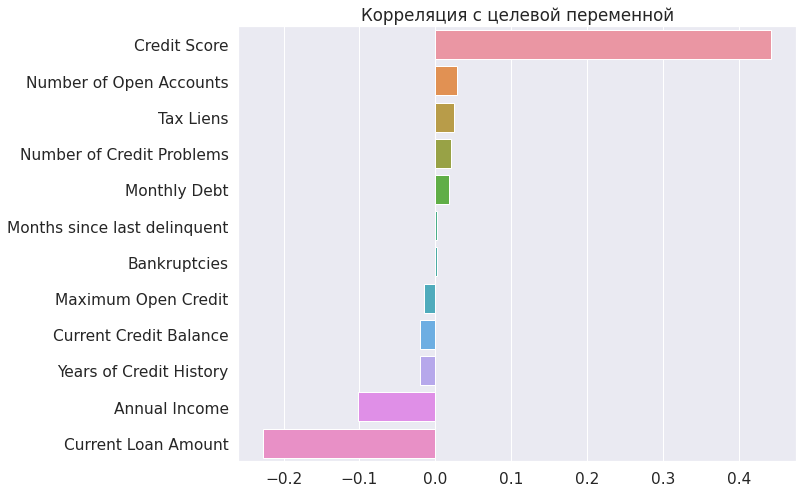

In [359]:
corr_with_target = df_train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Корреляция с целевой переменной')
plt.show()

Наибольшую корреляцию с целевой переменной показывает кредитный скорринг

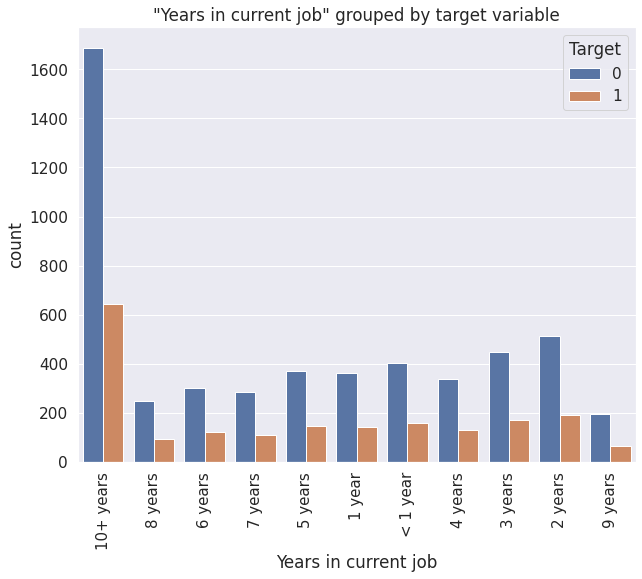

In [360]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years in current job", hue=TARGET_NAME, data=df_train)
plt.title('\"Years in current job\" grouped by target variable')
plt.legend(title='Target', loc='upper right')
plt.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               length = 0,    #  Длинна делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 15,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 90)

plt.show()

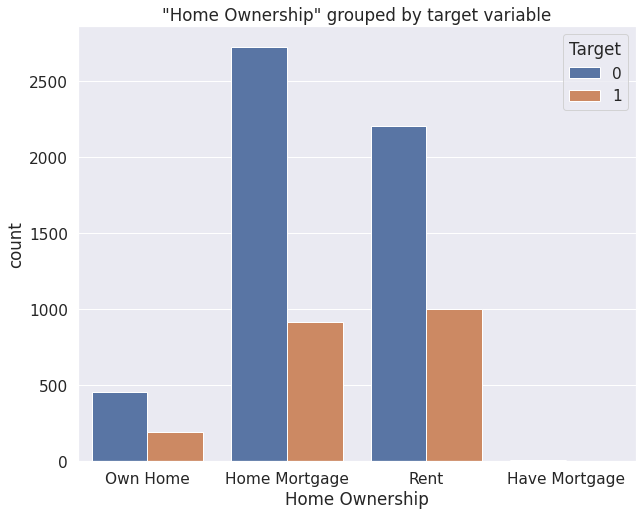

In [361]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home Ownership", hue=TARGET_NAME, data=df_train)
plt.title('\"Home Ownership\" grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

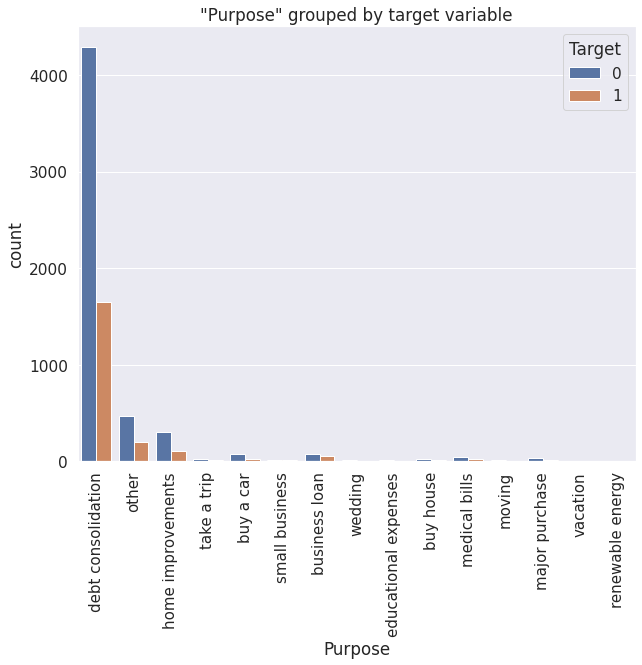

In [362]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Purpose", hue=TARGET_NAME, data=df_train)
plt.title('\"Purpose\" grouped by target variable')
plt.legend(title='Target', loc='upper right')
plt.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               length = 0,    #  Длинна делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 15,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 90)

plt.show()

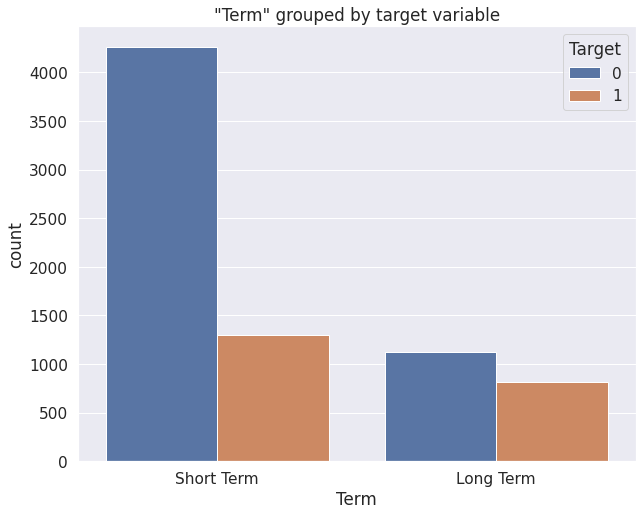

In [363]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term", hue=TARGET_NAME, data=df_train)
plt.title('\"Term\" grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Среди категориальных переменных нельзя выделить фичи, которые явно принадлежат к одному или другому классу целевой переменной

In [364]:
# обработка пропусков
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Заполним пропуски в Annual Income медианными значениями, сохранив при этом в отдельный столбец информацию о клиентах, доход которых неизвестен

Параметр Years in current job заполним случайными значениями из этого столбца, Bankruptcies нулями, Credit Score медианой, но сохраним в отдельную переменную информацию о клиентах, у которых этот параметр не заполнен

Пропусков в фиче Months since last delinquent больше, чем заполненных значений, возможно эту фичу стоит убрать из рассмотрения. Но пока заполним пропуски 0, предполагая, что если данные в графу не вносили, то у клиента не было задолженности
Также добавим признак, который будет фиксировать наличие задолженности

In [365]:
df_train.loc[(df_train['Current Loan Amount'] == 99999999.0), 'Current Loan Amount'].size

870

В тренировочном датасете 870 объектов с максимальным значением Current Loan Amount равным 99999999.0, это похоже на выброс. Обработаем его, присвоив в эти ячейки значение медианного размера займа, и добавим бинарный признак unknown_loan

In [369]:
def data_preprocessing(df):
    df_new = df.copy()
    # Заменяется пропуск NaN на 0 в 'Months since last delinquent'
    df_new['Months since last delinquent'].fillna(0, inplace=True)


    # Добавляется новый бинарный признак - 1/0 (задолженость/отсутствие задолженности)
    df_new['has_delay'] = 1
    df_new.loc[(df_new['Months since last delinquent'] == 0), 'has_delay'] = 0
    # Добавляется новый бинарный признак о неизвестном доходе 1/0 (доход известен/доход не известен)
    df_new['unknown_income'] = 0
    df_new.loc[(df_new['Annual Income'].isnull()), 'unknown_income'] = 1

    # В новую переменную annual_income_median записывается медианное значение дохода
    annual_income_median = df_new['Annual Income'].median()

    # Пропуски дохода заполняются медианным значением
    df_new['Annual Income'].fillna(annual_income_median, inplace=True)
    df_new['Bankruptcies'].fillna(0, inplace=True)
#     years_in_current_job_mode = df_new['Years in current job'].mode()
    
# #     df_new['Years in current job'].fillna(years_in_current_job_mode, inplace=True)
    
#     df_new.loc[df_new['Years in current job'].isnull(), 'Years in current job'] = years_in_current_job_mode

    unique_years_in_current_job = df_new['Years in current job'].unique()

    var_experiance = unique_years_in_current_job[1:]

    # NaN заменяются рандомными значениями трудового стажа
    df_new['Years in current job'].fillna(random.choice(var_experiance), inplace=True)

    df_new['unknown_score'] = 0
    df_new.loc[(df_new['Credit Score'].isnull()), 'unknown_score'] = 1

    df_new['Credit Score'].fillna(df_new['Credit Score'].median(), inplace=True)
    
    df_new['unknown_loan'] = 0
    df_new.loc[(df_new['Current Loan Amount'] == 99999999.0), 'unknown_loan'] = 1

    df_new.loc[(df_new['Current Loan Amount'] == 99999999.0), 'Current Loan Amount'] = 0

    median_current_loan_amount = df_new['Current Loan Amount'].median()
    df_new.loc[(df_new['Current Loan Amount'] == 99999999.0), 'Current Loan Amount'] = median_current_loan_amount
    return df_new

In [370]:
df_train = data_preprocessing(df_train)

In [371]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [372]:
df_train.loc[(df_train['unknown_loan'] == 1), 'unknown_loan'].size

870

In [373]:
NEW_FEATURE_NAMES = ['has_delay','unknown_income','unknown_score','unknown_loan']

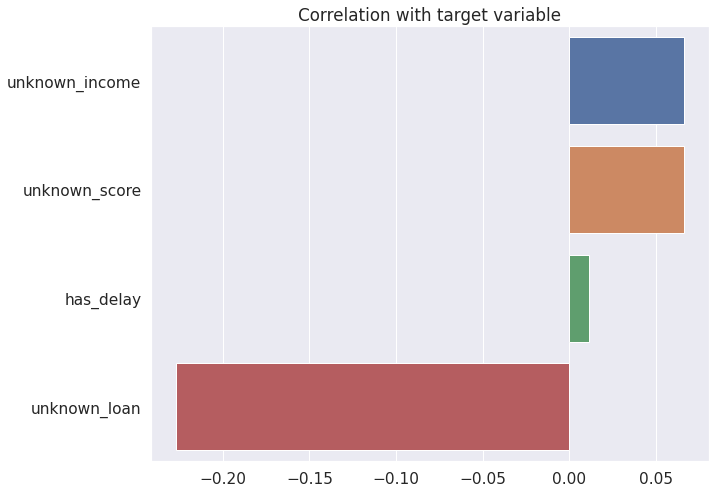

In [374]:
corr_with_target = df_train[NEW_FEATURE_NAMES + 
                            [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Корреляция с новыми фичами незначительная*

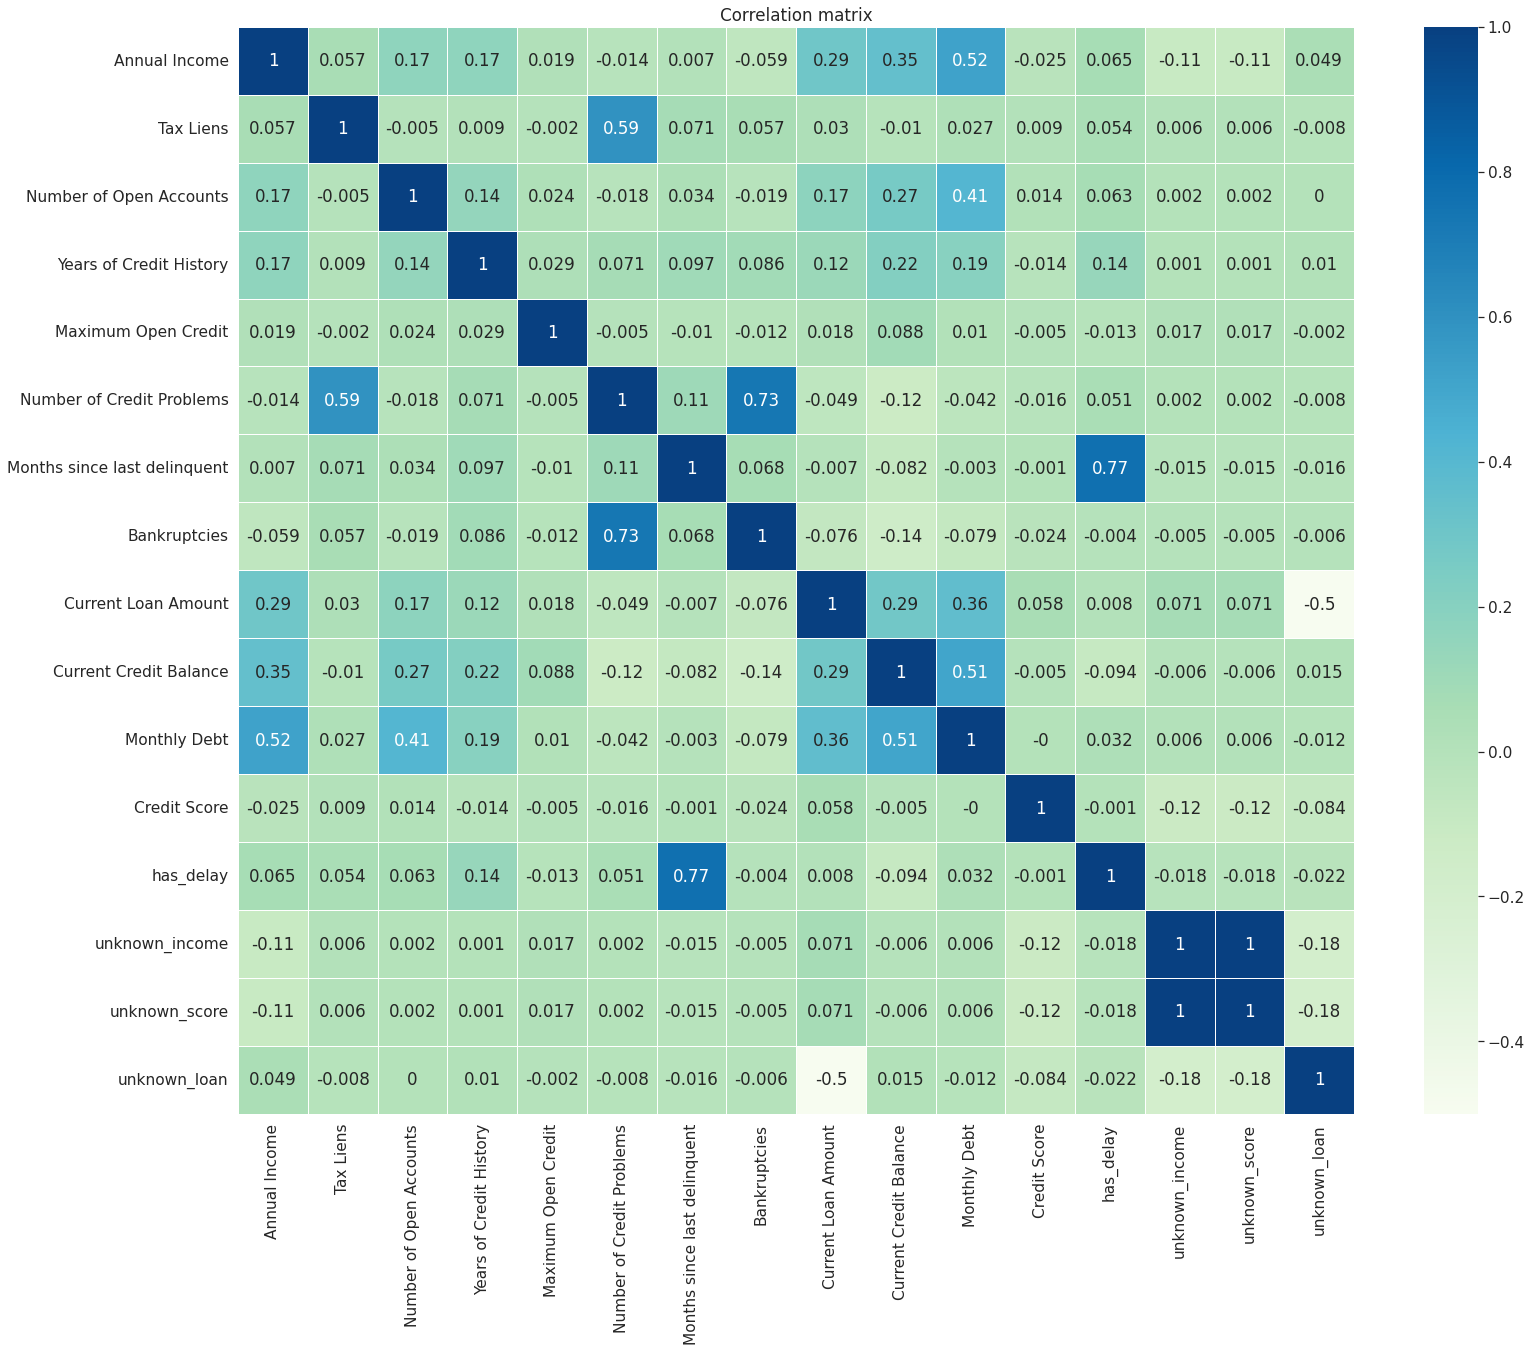

In [375]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[NUMB_FEATURE_NAMES + NEW_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Высокие корреляции:
    Number of Credit Problems vs Tax Liens = 0.59 обе фичи не показали сильного влияния на целевую переменную, возможно стоит отказаться от одной из них, чтобы снизить риск переобучения
    Bankruptcies vs Number of Credit Problems = 0.73 переменная Bankruptcies показывает нулевую корреляцию с целевой, также возможно стоит исключить этот признак
    Monthly Debt vs Annual Income = 0.52
    Monthly Debt vs Current Credit Balance = 0.51
    Monthly Debt vs Number of Open Accounts = 0.41
    has_delay vs Months since last delinquent = 0.77 
    unknown_loan vs Current Loan Amount = -0.5
Новые фичи, сформированные из незаполненных или выбросных данных сильно коррелируют с исходными данными, что вызывает сомнение в необходимости их использования
    

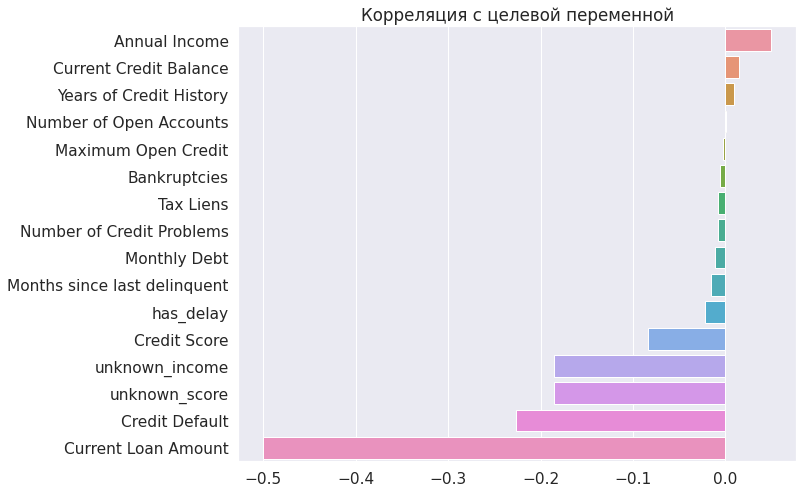

In [376]:
corr_with_target = df_train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Корреляция с целевой переменной')
plt.show()

После преобразования, обработки пропусков и выбросов, корреляция числовых признаков с целевой переменной поменялась

In [377]:
SELECTED_FEATURE_NAMES = BASE_FEATURE_NAMES + NEW_FEATURE_NAMES


X = df_train[SELECTED_FEATURE_NAMES]
y = df_train[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=11)

In [378]:
scaler = StandardScaler()

df_norm = df_train.copy()
df_norm[NUMB_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMB_FEATURE_NAMES])

df_train = df_norm.copy()

In [379]:
# функция для устранения дисбаланса целевого класса в выборке
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [380]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3768
1    2964
Name: Credit Default, dtype: int64

In [381]:
X_train = df_balanced.drop(columns=TARGET_NAME)
X_train_lr = X_train.drop(columns=CAT_FEATURE_NAMES)
X_test_lr = X_test.drop(columns=CAT_FEATURE_NAMES)
y_train = df_balanced[TARGET_NAME]

In [382]:
# функция для отображения результатов применения модели
def model_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train, y_train_pred))
    print('TEST\n\n' + classification_report(y_test, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test, y_test_pred))

В качестве базовой модели попробуем Логистическую регрессию

In [383]:
model_lr = LogisticRegression()
model_lr.fit(X_train_lr, y_train)

y_train_pred = model_lr.predict(X_train_lr)
y_test_pred = model_lr.predict(X_test_lr)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      3768
           1       0.65      0.54      0.59      2964

    accuracy                           0.67      6732
   macro avg       0.66      0.66      0.66      6732
weighted avg       0.67      0.67      0.66      6732

TEST

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1619
           1       0.47      0.53      0.50       631

    accuracy                           0.70      2250
   macro avg       0.64      0.65      0.64      2250
weighted avg       0.71      0.70      0.70      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1238  381
1                297  334


In [384]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_lr, y_train)

y_train_pred = model_knn.predict(X_train_lr)
y_test_pred = model_knn.predict(X_test_lr)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3768
           1       0.74      0.70      0.72      2964

    accuracy                           0.76      6732
   macro avg       0.76      0.75      0.75      6732
weighted avg       0.76      0.76      0.76      6732

TEST

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1619
           1       0.36      0.43      0.39       631

    accuracy                           0.63      2250
   macro avg       0.56      0.57      0.56      2250
weighted avg       0.65      0.63      0.64      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1143  476
1                361  270


In [385]:
model_xgb = xgb.XGBClassifier(random_state=11)
model_xgb.fit(X_train_lr, y_train)

y_train_pred = model_xgb.predict(X_train_lr)
y_test_pred = model_xgb.predict(X_test_lr)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3768
           1       0.97      0.97      0.97      2964

    accuracy                           0.97      6732
   macro avg       0.97      0.97      0.97      6732
weighted avg       0.97      0.97      0.97      6732

TEST

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1619
           1       0.52      0.44      0.48       631

    accuracy                           0.73      2250
   macro avg       0.66      0.64      0.65      2250
weighted avg       0.72      0.73      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1363  256
1                354  277


In [386]:
model_lgbm = lgbm.LGBMClassifier(random_state=11)
model_lgbm.fit(X_train_lr, y_train)

y_train_pred = model_lgbm.predict(X_train_lr)
y_test_pred = model_lgbm.predict(X_test_lr)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3768
           1       0.94      0.90      0.92      2964

    accuracy                           0.93      6732
   macro avg       0.93      0.93      0.93      6732
weighted avg       0.93      0.93      0.93      6732

TEST

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1619
           1       0.50      0.45      0.47       631

    accuracy                           0.72      2250
   macro avg       0.65      0.64      0.64      2250
weighted avg       0.71      0.72      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1341  278
1                348  283


In [387]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=11, cat_features=CAT_FEATURE_NAMES)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3768
           1       0.91      0.82      0.86      2964

    accuracy                           0.88      6732
   macro avg       0.89      0.88      0.88      6732
weighted avg       0.89      0.88      0.88      6732

TEST

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1619
           1       0.55      0.48      0.51       631

    accuracy                           0.74      2250
   macro avg       0.68      0.66      0.67      2250
weighted avg       0.73      0.74      0.74      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1376  243
1                331  300


In [388]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(x = feature_importances['importance'], y = feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

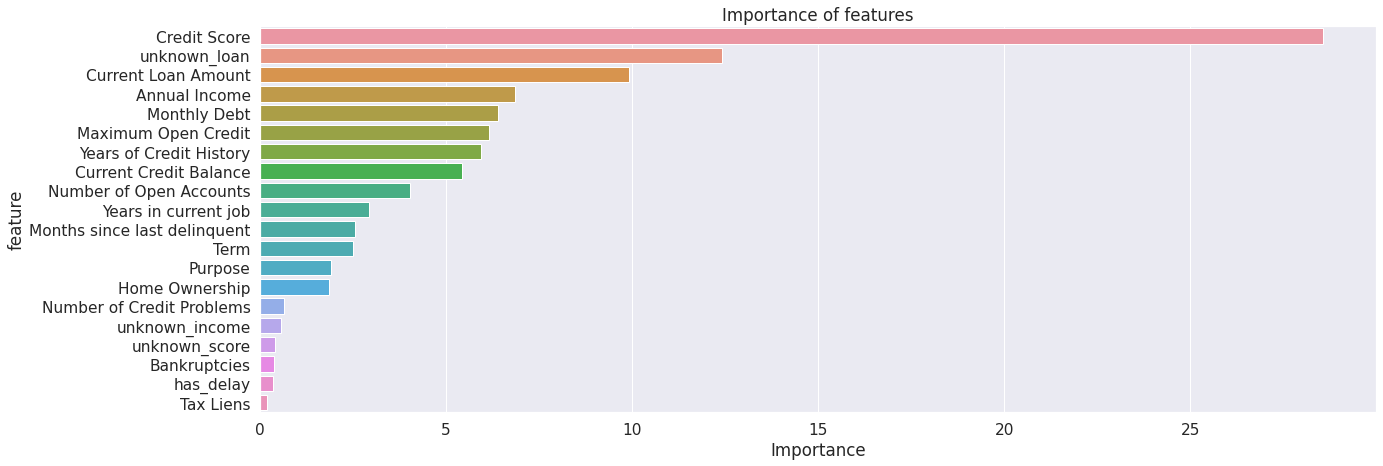

In [390]:
important_features_top = show_feature_importances(X_train.columns, model_catb.feature_importances_, get_top=14)

В базовой версии сложные модели показывают результаты хуже, чем логистическая регрессия, попробуем подобрать параметры для улучшения показателей сложной модели CatBoost, используем веса классов и поиск по сетке

In [393]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=11, cat_features=CAT_FEATURE_NAMES)
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}
cv=KFold(n_splits=3, random_state=11, shuffle=True)

In [394]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train[important_features_top], y_train)

CPU times: user 19.6 s, sys: 899 ms, total: 20.5 s
Wall time: 2min 47s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f5bb8056670>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   scoring='f1')

In [398]:
rs.best_params_

{'n_estimators': 1500, 'max_depth': 7}

In [397]:
rs.best_score_

0.7178179509006762

In [404]:
final_model = catb.CatBoostClassifier(class_weights=[1, 3.5], n_estimators=1000, max_depth=5, l2_leaf_reg=10,
                                      silent=True, random_state=21, cat_features=CAT_FEATURE_NAMES)
final_model.fit(X_train[important_features_top], y_train)

y_train_pred = final_model.predict(X_train[important_features_top])
y_test_pred = final_model.predict(X_test[important_features_top])
y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.99      0.46      0.63      3768
           1       0.59      1.00      0.74      2964

    accuracy                           0.69      6732
   macro avg       0.79      0.73      0.68      6732
weighted avg       0.82      0.69      0.68      6732

TEST

              precision    recall  f1-score   support

           0       0.91      0.39      0.54      1619
           1       0.36      0.90      0.52       631

    accuracy                           0.53      2250
   macro avg       0.64      0.64      0.53      2250
weighted avg       0.76      0.53      0.53      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               624  995
1                63  568


In [408]:
df_test = data_preprocessing(df_test)

In [409]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 2500 non-null   float64
 2   Years in current job          2500 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  2500 non-null   float64
 9   Bankruptcies                  2500 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [410]:
y_pred_output = final_model.predict(df_test[important_features_top])

In [411]:
result=pd.DataFrame({'Id':np.arange(2500), 'Credit Default': y_pred_output})

In [412]:
result

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
2495,2495,0
2496,2496,1
2497,2497,1
2498,2498,1


In [413]:
RESULT_PATH='./test_predictions.csv'
result.to_csv(RESULT_PATH, index=False)